# Practica 2

### Procedimiento:

3. Análisis estadístico
Con el archivo CSV generado:

- Calcula:
    - Media (μ)  
    - Desviación estándar (σ) 
    - Error absoluto medio (MAE) 
    - Error estándar de la media (SEM)
    - Intervalo de confianza del 95%


### Sensor ultrasónico HC-SR04
- Voltaje de operación: 5V DC
- Corriente de funcionamiento: 15 mA
- Frecuencia de operación: 40 kHz
- Rango máximo: 4 m
- Rango mínimo: 2 cm
- Precisión de alcance: 3 mm
- Ángulo de medición: 15 grados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro

### Carga los datos

In [8]:
data = pd.read_csv("sensor_readings_202504210530_pedro_30cm.csv")

#### Crea un histograma con los datos de las distancias
utiliza la función `hist` de pyplot

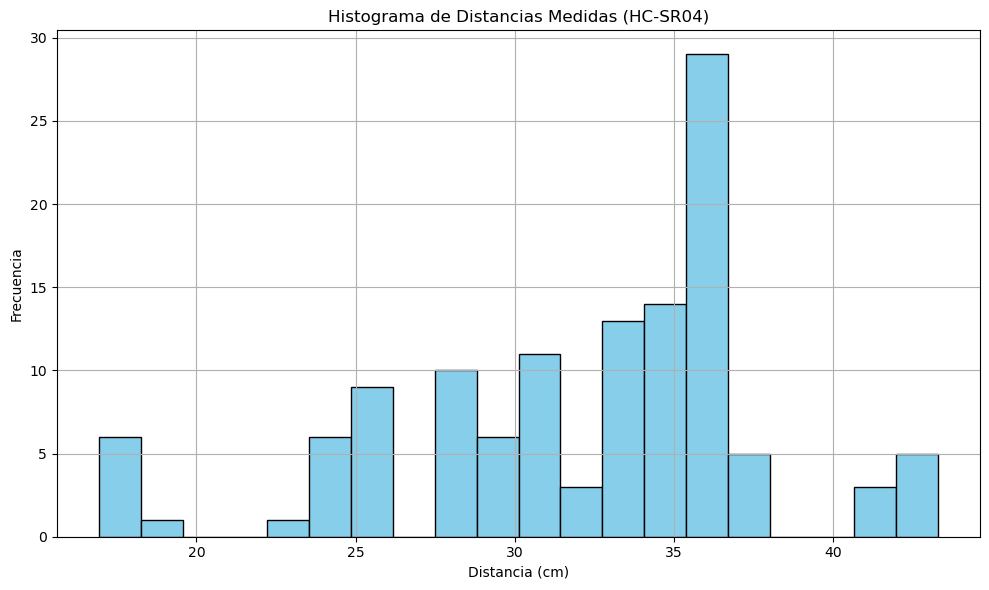

In [9]:
distances = data["distance_cm"]
# Crear histograma
plt.figure(figsize=(10, 6))
## tu codigo aqui ###
plt.hist(distances, bins=20, color='skyblue', edgecolor='black')  

#######################
plt.title("Histograma de Distancias Medidas (HC-SR04)")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.savefig("1")
plt.show()

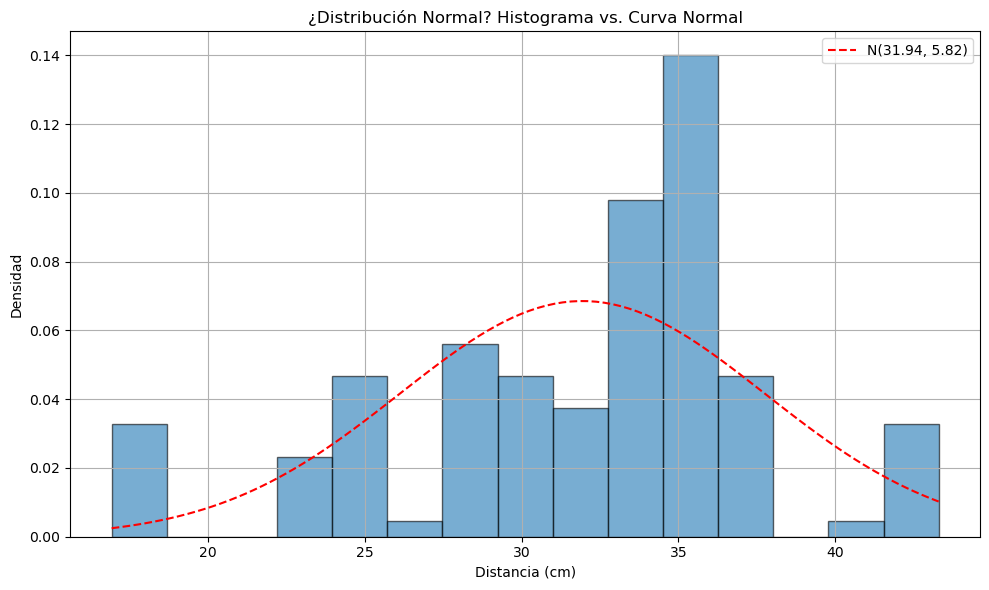

In [20]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(distances, bins=15, density=True, alpha=0.6, edgecolor='black')

# Curva normal ajustada
x = np.linspace(min(distances), max(distances), 100)
plt.plot(x, norm.pdf(x, mean, std), 'r--', label=f'N({mean:.2f}, {std:.2f})')

plt.title("¿Distribución Normal? Histograma vs. Curva Normal")
plt.xlabel("Distancia (cm)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("2")
plt.show()

### Gráfica Q-Q (Quantile-Quantile)
Muestra si los cuantiles de tus datos se alinean con los de una distribución normal.
Si los puntos siguen la línea recta central tus datos se distribuyen normalmente.

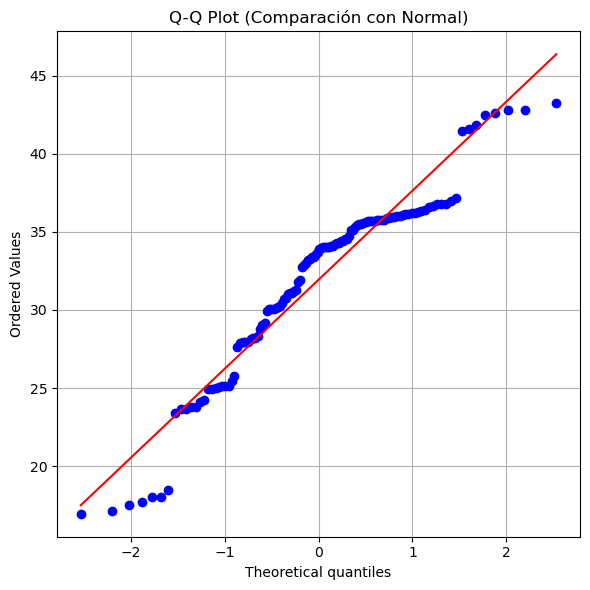

In [21]:
# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(distances, dist="norm", plot=plt)
plt.title("Q-Q Plot (Comparación con Normal)")
plt.grid(True)
plt.tight_layout()
plt.savefig("3")
plt.show()

In [13]:
## Estadísticas
mean = distances.mean()
std = distances.std()
sem = distances.sem()

print(f"Media (μ): {mean:.2f} cm")
print(f"Desviación estándar (σ): {std:.2f} cm")
print(f"Incertidumbre estándar (SEM): {sem:.2f} cm")

Media (μ): 31.94 cm
Desviación estándar (σ): 5.82 cm
Incertidumbre estándar (SEM): 0.53 cm


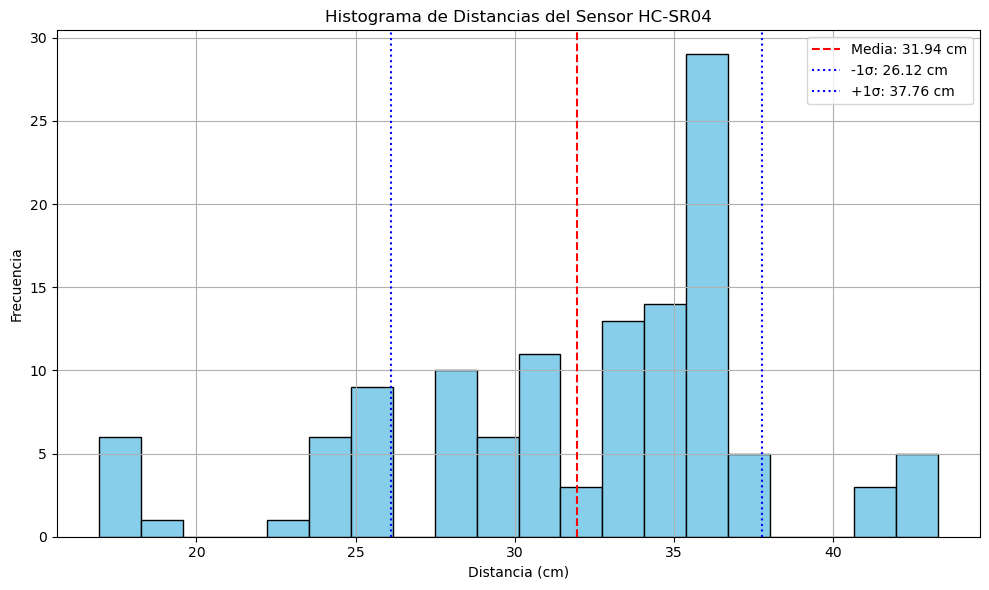

In [22]:
# Gráfico
plt.figure(figsize=(10, 6))
## tu codigo aqui (es el mismo codigo que en el primer histograma)
plt.hist(distances, bins=20, color='skyblue', edgecolor='black')

#######################
plt.axvline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f} cm')
plt.axvline(mean - std, color='blue', linestyle=':', label=f'-1σ: {mean - std:.2f} cm')
plt.axvline(mean + std, color='blue', linestyle=':', label=f'+1σ: {mean + std:.2f} cm')

# Estilo del gráfico
plt.title("Histograma de Distancias del Sensor HC-SR04")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("4")
plt.show()

### Calculo del error

In [15]:
true_distance = 30.0

errors = distances - true_distance
mae = np.mean(errors)
std = np.std(distances, ddof=1)

print(f"Distancia real: {true_distance} cm")
print(f"Error medio absoluto (MAE): {mae:.3f} cm")
print(f"Desviación estándar: {std:.3f} cm")

Distancia real: 30.0 cm
Error medio absoluto (MAE): 1.938 cm
Desviación estándar: 5.820 cm


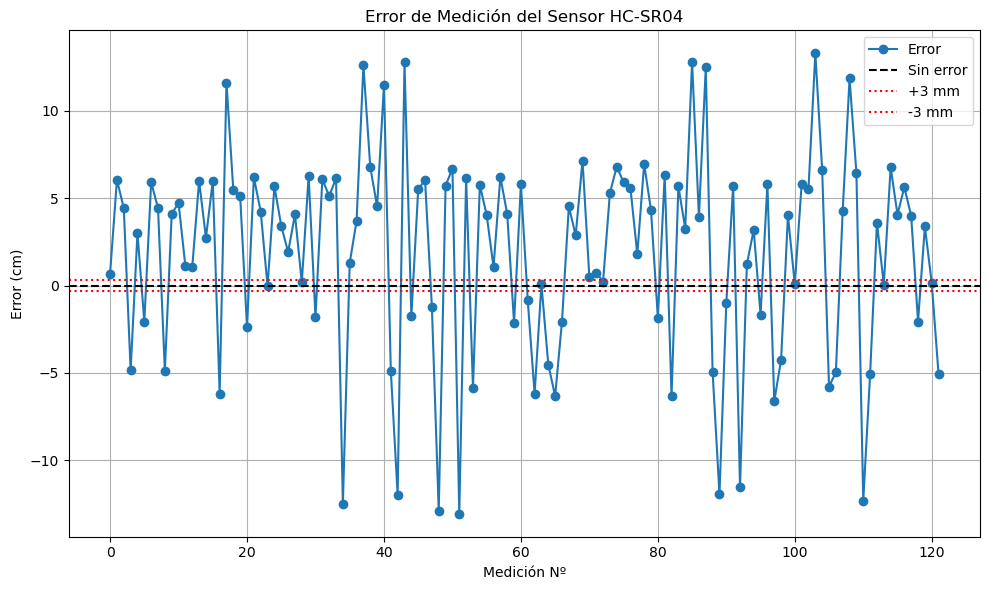

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(errors.values, marker='o', linestyle='-', label="Error")
plt.axhline(0, color='black', linestyle='--', label="Sin error")
plt.axhline(0.3, color='red', linestyle=':', label="+3 mm")
plt.axhline(-0.3, color='red', linestyle=':', label="-3 mm")

plt.title("Error de Medición del Sensor HC-SR04")
plt.xlabel("Medición Nº")
plt.ylabel("Error (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("5")
plt.show()

/tmp/ipykernel_6750/2721743501.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


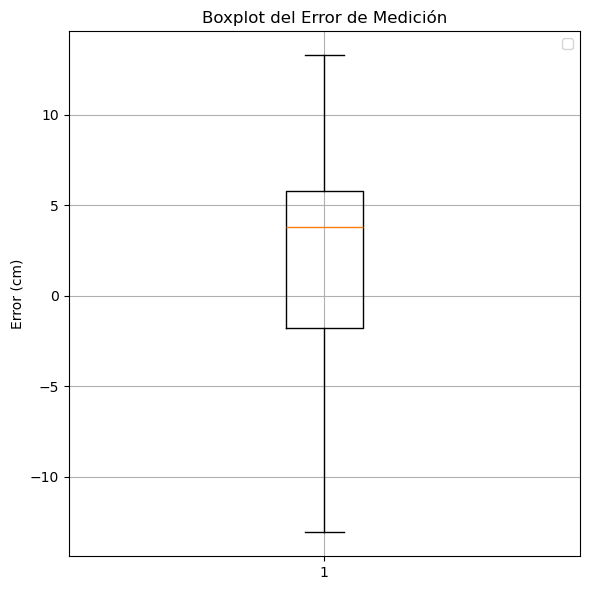

In [24]:
plt.figure(figsize=(6, 6))
plt.boxplot(errors, vert=True)

plt.title("Boxplot del Error de Medición")
plt.ylabel("Error (cm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("6")
plt.show()

## Intervalo de confianza

$$
\text{ME} = z \cdot \frac{\sigma}{\sqrt{n}}
$$

- ME es el margen de error.

- z es el valor crítico (por ejemplo, 1.96 para un 95% de confianza).

- σ es la desviación estándar muestral.

- n es el tamaño de la muestra.

In [18]:
n = len(distances)

# Z-score para 95% de confianza
z = norm.ppf(0.975)  # 2-tailed, 0.975 ≈ 95%

# Margen de error
me = z * (std / np.sqrt(n))

# Intervalo de confianza
ci_lower = mean - me
ci_upper = mean + me

print(f"Media: {mean:.2f} cm")
print(f"Desviación estándar: {std:.2f} cm")
print(f"N: {n}")
print(f"Margen de error (95%): ±{me:.2f} cm")
print(f"Intervalo de confianza al 95%: [{ci_lower:.2f} cm, {ci_upper:.2f} cm]")


Media: 31.94 cm
Desviación estándar: 5.82 cm
N: 122
Margen de error (95%): ±1.03 cm
Intervalo de confianza al 95%: [30.91 cm, 32.97 cm]
